In [1]:
import uproot

file = uproot.open(
    "root://eospublic.cern.ch//eos/opendata/cms/derived-data/AOD2NanoAODOutreachTool/Run2012BC_DoubleMuParked_Muons.root"
)
file.classnames()

{'Events;75': 'TTree', 'Events;74': 'TTree'}

In [2]:
tree = file["Events"]
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
nMuon                | uint32_t                 | AsDtype('>u4')
Muon_pt              | float[]                  | AsJagged(AsDtype('>f4'))
Muon_eta             | float[]                  | AsJagged(AsDtype('>f4'))
Muon_phi             | float[]                  | AsJagged(AsDtype('>f4'))
Muon_mass            | float[]                  | AsJagged(AsDtype('>f4'))
Muon_charge          | int32_t[]                | AsJagged(AsDtype('>i4'))


In [3]:
muons = tree.arrays(
    ["Muon_pt", "Muon_eta", "Muon_phi", "Muon_mass", "Muon_charge"], entry_stop=1_000
)
muons

<Array [{Muon_pt: [...], ...}, ..., {...}] type='1000 * {Muon_pt: var * flo...'>

In [4]:
muons["Muon_pt"]
muons["Muon_eta"]
muons["Muon_phi"]  # etc.

<Array [[-0.0343, 2.54], ..., [2.08, ..., -1.47]] type='1000 * var * float32'>

In [5]:
tree.keys(filter_name="Muon_*")

tree.arrays(filter_name="Muon_*", entry_stop=1_000)

<Array [{Muon_pt: [...], ...}, ..., {...}] type='1000 * {Muon_pt: var * flo...'>

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x16159c790>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

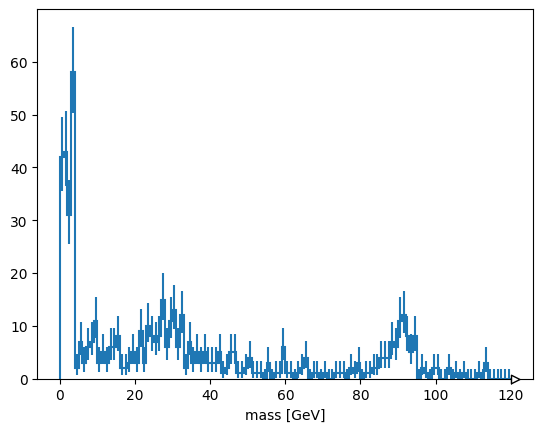

In [6]:
muons = tree.arrays(entry_stop=1_000)
cut = muons["nMuon"] == 2

pt0 = muons["Muon_pt", cut, 0]
pt1 = muons["Muon_pt", cut, 1]
eta0 = muons["Muon_eta", cut, 0]
eta1 = muons["Muon_eta", cut, 1]
phi0 = muons["Muon_phi", cut, 0]
phi1 = muons["Muon_phi", cut, 1]

import numpy as np

mass = np.sqrt(2 * pt0 * pt1 * (np.cosh(eta0 - eta1) - np.cos(phi0 - phi1)))

import hist

masshist = hist.Hist(hist.axis.Regular(120, 0, 120, label="mass [GeV]"))
masshist.fill(mass)
masshist.plot()

In [7]:
tree.keys(filter_name=["nMuon", "/Muon_(pt|eta|phi)/"])

['nMuon', 'Muon_pt', 'Muon_eta', 'Muon_phi']

0.02476806582367265
0.04953244301431646
0.07414066265691133
0.09883069845501362
0.12372555900786691
0.14857022490245556
0.1733401756663544
0.19790541542189521
0.2231366240587303
0.24903843268000167
0.2746961577914662
0.3004716591680982
0.3266033492495411
0.35272515964428125
0.37907369909915944
0.4053174618766371
0.4309308746433015
0.4559705993523313
0.4818679393653078
0.5026042967894935


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x16f101450>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

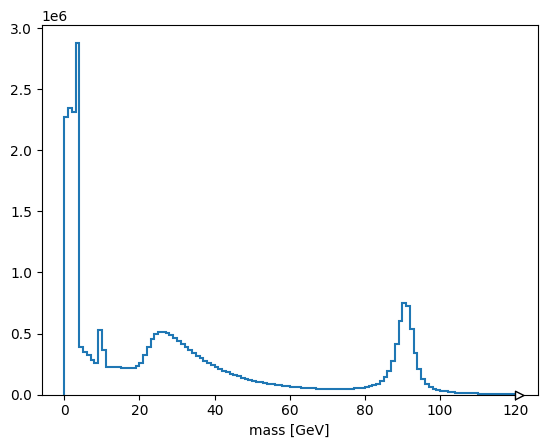

In [8]:
masshist = hist.Hist(hist.axis.Regular(120, 0, 120, label="mass [GeV]"))

for muons in tree.iterate(filter_name=["nMuon", "/Muon_(pt|eta|phi)/"]):
    cut = muons["nMuon"] == 2
    pt0 = muons["Muon_pt", cut, 0]
    pt1 = muons["Muon_pt", cut, 1]
    eta0 = muons["Muon_eta", cut, 0]
    eta1 = muons["Muon_eta", cut, 1]
    phi0 = muons["Muon_phi", cut, 0]
    phi1 = muons["Muon_phi", cut, 1]
    mass = np.sqrt(2 * pt0 * pt1 * (np.cosh(eta0 - eta1) - np.cos(phi0 - phi1)))
    masshist.fill(mass)
    print(masshist.sum() / tree.num_entries)

masshist.plot()

In [9]:
tree["nMuon"].array(library="np", entry_stop=10_000)

tree.arrays(library="np", entry_stop=10_000)

tree.arrays(library="pd", entry_stop=10_000)

,nMuon,Muon_pt,Muon_eta,Muon_phi,Muon_mass,Muon_charge
0,2,"[10.763696670532227, 15.736522674560547]","[1.0668272972106934, -0.563786506652832]","[-0.03427272289991379, 2.5426154136657715]","[0.10565836727619171, 0.10565836727619171]","[-1, -1]"
1,2,"[10.538490295410156, 16.327096939086914]","[-0.42778006196022034, 0.34922507405281067]","[-0.2747921049594879, 2.539781332015991]","[0.10565836727619171, 0.10565836727619171]","[1, -1]"
2,1,[3.2753264904022217],[2.210855484008789],[-1.2234135866165161],[0.10565836727619171],[1]
3,4,"[11.429154396057129, 17.634033203125, 9.624728...","[-1.5882395505905151, -1.7511844635009766, -1....","[-2.0773041248321533, 0.25135836005210876, -2....","[0.10565836727619171, 0.10565836727619171, 0.1...","[1, 1, 1, 1]"
4,4,"[3.2834417819976807, 3.64400577545166, 32.9112...","[-2.1724836826324463, -2.18253493309021, -1.12...","[-2.3700082302093506, -2.3051390647888184, -0....","[0.10565836727619171, 0.10565836727619171, 0.1...","[-1, -1, 1, 1]"
...,...,...,...,...,...,...
9995,2,"[26.859142303466797, 9.353170394897461]","[1.930126667022705, 1.9606289863586426]","[2.006714105606079, 1.871167540550232]","[0.10565836727619171, 0.10565836727619171]","[1, -1]"
9996,2,"[9.003849029541016, 14.049983978271484]","[1.7759391069412231, 1.0048433542251587]","[-0.8459293246269226, 2.2061259746551514]","[0.10565836727619171, 0.10565836727619171]","[-1, 1]"
9997,2,"[30.238283157348633, 13.03593635559082]","[-1.198452353477478, -2.027805805206299]","[-2.2813563346862793, 0.6028729677200317]","[0.10565836727619171, 0.10565836727619171]","[1, -1]"
9998,2,"[17.35597038269043, 15.87411880493164]","[-0.8361367583274841, -0.8279833793640137]","[-1.4231573343276978, -1.4103615283966064]","[0.10565836727619171, 0.10565836727619171]","[1, -1]"
